--------------------------------------

Accuracy:0.59


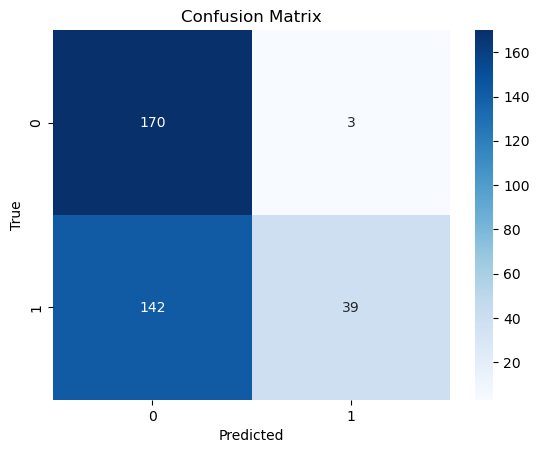

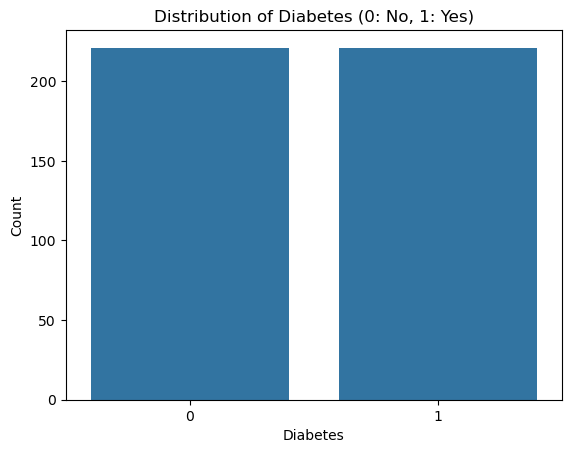

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix


data = load_diabetes()
x =data.data
y =data.target

y_binary =(y > 140).astype(int)
#print(y_binary) 

df =pd.DataFrame(x, columns=data.feature_names)
df['Diabetes'] =y_binary
df.head()

x_train, x_test, y_train, y_test =train_test_split(x, y_binary, train_size=0.2, random_state=42)

LoR =LogisticRegression(max_iter=1000)
LoR.fit(x_train, y_train)

y_pred =LoR.predict(x_test)
acc =accuracy_score(y_test, y_pred)
print(f"Accuracy:{acc:.2f}")

cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes (0: No, 1: Yes)')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

------------------------------